# Pembersihan Dataset Compendium of Physical Activities
Berikut kode lengkap dalam format notebook untuk membersihkan dataset Compendium of Physical Activities agar siap digunakan dalam aplikasi diet Anda.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set tampilan plot
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## 1. Memuat dan Memeriksa Dataset

In [3]:
import sys
!{sys.executable} -m pip install openpyxl

You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
# Membaca dataset
print("Membaca dataset Compendium of Physical Activities...")
activities = pd.read_excel('2024_Adult_Compendium.xlsx')

# Memeriksa struktur data
print("\n== Informasi Dataset ==")
print(f"Jumlah baris: {activities.shape[0]}")
print(f"Jumlah kolom: {activities.shape[1]}")
print("\n== 5 Baris Pertama ==")
display(activities.head())

# Memeriksa nama kolom
print("\n== Nama Kolom ==")
print(activities.columns.tolist())

# Memeriksa tipe data
print("\n== Tipe Data ==")
print(activities.dtypes)

# Memeriksa nilai yang hilang
print("\n== Nilai yang Hilang ==")
print(activities.isnull().sum())

Membaca dataset Compendium of Physical Activities...

== Informasi Dataset ==
Jumlah baris: 1112
Jumlah kolom: 4

== 5 Baris Pertama ==


,2024 Adult Compendium of Physical Activities,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Major Heading,Activity Code,MET Value,Activity Description
1,Bicycling,1003,14,"Bicycling, mountain, uphill, vigorous"
2,Bicycling,1004,16,"Bicycling, mountain, competitive racing"
3,Bicycling,1008,8.5,"Bicycling, BMX"
4,Bicycling,1009,8.5,"Bicycling, mountain, general"



== Nama Kolom ==
['2024 Adult Compendium of Physical Activities', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']

== Tipe Data ==
2024 Adult Compendium of Physical Activities    object
Unnamed: 1                                      object
Unnamed: 2                                      object
Unnamed: 3                                      object
dtype: object

== Nilai yang Hilang ==
2024 Adult Compendium of Physical Activities    0
Unnamed: 1                                      0
Unnamed: 2                                      0
Unnamed: 3                                      0
dtype: int64


## 2. Membersihkan dan Menyiapkan Data

In [9]:
# Membaca dataset dengan header yang benar (baris ke-2)
print("Membaca dataset Compendium of Physical Activities...")
activities = pd.read_excel('2024_Adult_Compendium.xlsx', header=1)

# Periksa hasilnya
print("Kolom setelah membaca dengan header yang benar:", activities.columns.tolist())

# Membuat salinan dataset untuk dibersihkan
activities_clean = activities.copy()

# Rename kolom untuk kejelasan
print("\n== Menyesuaikan Nama Kolom ==")
column_mapping = {
    'Major Heading': 'activity_category',
    'Activity Code': 'activity_id',
    'MET Value': 'met_value',
    'Activity Description': 'activity_name'
}
activities_clean = activities_clean.rename(columns=column_mapping)
print("Kolom setelah rename:", activities_clean.columns.tolist())

# Menangani nilai yang hilang
print("\n== Menangani Nilai yang Hilang ==")
activities_clean['met_value'] = activities_clean['met_value'].fillna(0)
activities_clean = activities_clean.dropna(subset=['activity_name'])
print(f"Jumlah baris setelah menangani nilai yang hilang: {activities_clean.shape[0]}")

# Mengekstrak kategori aktivitas dari nama aktivitas
print("\n== Mengekstrak Kategori Aktivitas ==")
def extract_category(activity_name):
    if pd.isna(activity_name):
        return "Uncategorized"
    
    # Ekstrak kata pertama sebagai kategori dasar
    first_word = activity_name.split(',')[0].strip()
    
    # Pemetaan kategori umum
    category_mapping = {
        'Bicycling': 'Cycling',
        'E-bike': 'Cycling',
        'Running': 'Running',
        'Jogging': 'Running',
        'Walking': 'Walking',
        'Swimming': 'Swimming',
        'Sports': 'Sports',
        'Conditioning': 'Conditioning',
        'Home': 'Home Activities',
        'Occupation': 'Occupational',
        'Lawn': 'Yard Work',
        'Garden': 'Yard Work'
    }
    
    # Cek apakah kata pertama ada dalam pemetaan
    for key in category_mapping:
        if key in activity_name:
            return category_mapping[key]
    
    return first_word

activities_clean['activity_category'] = activities_clean['activity_name'].apply(extract_category)
print("Kategori aktivitas yang diekstrak (10 teratas):")
print(activities_clean['activity_category'].value_counts().head(10))

Membaca dataset Compendium of Physical Activities...
Kolom setelah membaca dengan header yang benar: ['Major Heading', 'Activity Code', 'MET Value', 'Activity Description']

== Menyesuaikan Nama Kolom ==
Kolom setelah rename: ['activity_category', 'activity_id', 'met_value', 'activity_name']

== Menangani Nilai yang Hilang ==
Jumlah baris setelah menangani nilai yang hilang: 1111

== Mengekstrak Kategori Aktivitas ==
Kategori aktivitas yang diekstrak (10 teratas):
activity_category
Walking            84
Running            64
Cycling            46
Swimming           18
Standing           18
Skiing             17
Climbing hills     12
Farming            12
Sitting            11
Aquatic cycling    10
Name: count, dtype: int64


## 3. Pengayaan Data (Data Enrichment)

In [11]:
# Konversi kolom met_value ke tipe data numerik
print("\n== Mengonversi Data Numerik ==")
# Cek tipe data sebelum konversi
print("Tipe data met_value sebelum konversi:", activities_clean['met_value'].dtype)

# Konversi ke numerik, dengan coerce untuk menangani nilai yang tidak bisa dikonversi
activities_clean['met_value'] = pd.to_numeric(activities_clean['met_value'], errors='coerce')

# Cek tipe data setelah konversi
print("Tipe data met_value setelah konversi:", activities_clean['met_value'].dtype)
print("Sample nilai met_value setelah konversi:")
print(activities_clean['met_value'].head())

# Isi nilai yang hilang dengan 0
activities_clean['met_value'] = activities_clean['met_value'].fillna(0)

# Menambahkan kolom kalori per kg per jam
print("\n== Menambahkan Informasi Kalori ==")
# Rumus: 1 MET ≈ 1 kcal/kg/jam
activities_clean['calories_per_kg_per_hour'] = activities_clean['met_value']

# Menambahkan kategori intensitas berdasarkan nilai MET
print("\n== Menambahkan Kategori Intensitas ==")
def get_intensity(met):
    if met < 3:
        return 'Ringan'
    elif met < 6:
        return 'Sedang'
    else:
        return 'Berat'

activities_clean['intensity_level'] = activities_clean['met_value'].apply(get_intensity)
print("Distribusi intensitas aktivitas:")
print(activities_clean['intensity_level'].value_counts())

# Menambahkan kolom rekomendasi durasi
print("\n== Menambahkan Rekomendasi Durasi ==")
def get_recommended_duration(intensity):
    if intensity == 'Ringan':
        return '45-60 menit'
    elif intensity == 'Sedang':
        return '30-45 menit'
    else:  # Berat
        return '15-30 menit'

activities_clean['recommended_duration'] = activities_clean['intensity_level'].apply(get_recommended_duration)

# Menambahkan kolom rekomendasi frekuensi mingguan
activities_clean['recommended_frequency'] = activities_clean['intensity_level'].map({
    'Ringan': '5-7 kali/minggu',
    'Sedang': '3-5 kali/minggu',
    'Berat': '2-3 kali/minggu'
})

# Menambahkan flag untuk aktivitas kardio
print("\n== Menambahkan Flag Kardio ==")
cardio_keywords = ['bicycling', 'running', 'jogging', 'swimming', 'walking', 'hiking', 'treadmill', 'elliptical', 'rowing', 'aerobic']
activities_clean['is_cardio'] = activities_clean['activity_name'].str.lower().apply(
    lambda x: any(keyword in x for keyword in cardio_keywords) if isinstance(x, str) else False
)
print(f"Jumlah aktivitas kardio: {activities_clean['is_cardio'].sum()}")
print(f"Jumlah aktivitas non-kardio: {len(activities_clean) - activities_clean['is_cardio'].sum()}")

# Menambahkan kolom peralatan yang dibutuhkan
print("\n== Menambahkan Informasi Peralatan ==")
def extract_equipment(activity_name):
    if pd.isna(activity_name):
        return "None"
    
    equipment_keywords = {
        'treadmill': 'Treadmill',
        'elliptical': 'Elliptical trainer',
        'stationary': 'Stationary bike',
        'weights': 'Weights',
        'machine': 'Exercise machine',
        'bike': 'Bicycle',
        'bicycle': 'Bicycle',
        'e-bike': 'Electric bicycle',
        'swimming': 'Swimming pool',
        'rowing': 'Rowing machine'
    }
    
    for keyword, equipment in equipment_keywords.items():
        if keyword in activity_name.lower():
            return equipment
    
    return "None"

activities_clean['equipment_needed'] = activities_clean['activity_name'].apply(extract_equipment)
print("Distribusi peralatan yang dibutuhkan (10 teratas):")
print(activities_clean['equipment_needed'].value_counts().head(10))

# Menambahkan kolom indoor/outdoor
print("\n== Menambahkan Klasifikasi Indoor/Outdoor ==")
def classify_location(activity_name):
    if pd.isna(activity_name):
        return "Unknown"
    
    indoor_keywords = ['home', 'stationary', 'treadmill', 'elliptical', 'gym', 'machine', 'indoor']
    outdoor_keywords = ['hiking', 'mountain', 'trail', 'outdoor', 'road', 'field']
    
    activity_lower = activity_name.lower()
    
    if any(keyword in activity_lower for keyword in indoor_keywords):
        return "Indoor"
    elif any(keyword in activity_lower for keyword in outdoor_keywords):
        return "Outdoor"
    else:
        return "Both"

activities_clean['location'] = activities_clean['activity_name'].apply(classify_location)
print("Distribusi lokasi aktivitas:")
print(activities_clean['location'].value_counts())

# Menambahkan contoh kalkulasi kalori untuk berat badan standar
print("\n== Menambahkan Contoh Kalkulasi Kalori ==")
standard_weights = [50, 70, 90]  # kg
durations = [30, 60]  # menit

for weight in standard_weights:
    for duration in durations:
        column_name = f'calories_{weight}kg_{duration}min'
        # Kalori = MET × berat (kg) × durasi (jam)
        activities_clean[column_name] = activities_clean['met_value'] * weight * (duration / 60)

print("Kolom kalori contoh yang ditambahkan:")
print([col for col in activities_clean.columns if 'calories_' in col])


== Mengonversi Data Numerik ==
Tipe data met_value sebelum konversi: object
Tipe data met_value setelah konversi: float64
Sample nilai met_value setelah konversi:
0    14.0
1    16.0
2     8.5
3     8.5
4     4.0
Name: met_value, dtype: float64

== Menambahkan Informasi Kalori ==

== Menambahkan Kategori Intensitas ==
Distribusi intensitas aktivitas:
intensity_level
Berat     431
Sedang    426
Ringan    254
Name: count, dtype: int64

== Menambahkan Rekomendasi Durasi ==

== Menambahkan Flag Kardio ==
Jumlah aktivitas kardio: 301
Jumlah aktivitas non-kardio: 810

== Menambahkan Informasi Peralatan ==
Distribusi peralatan yang dibutuhkan (10 teratas):
equipment_needed
None                  1014
Treadmill               30
Stationary bike         20
Swimming pool           19
Bicycle                  9
Exercise machine         9
Rowing machine           7
Elliptical trainer       2
Weights                  1
Name: count, dtype: int64

== Menambahkan Klasifikasi Indoor/Outdoor ==
Distribus

## 4. Analisis Eksplorasi Data


== Distribusi Nilai MET ==


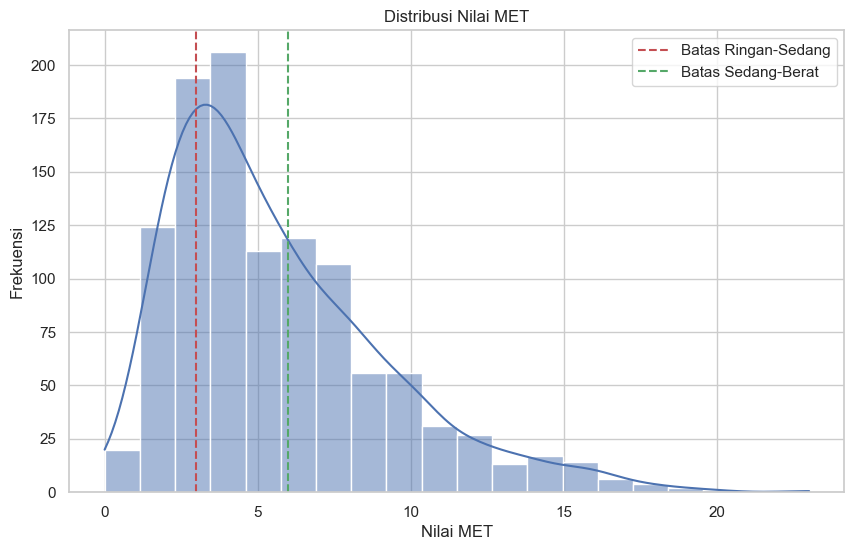


== Nilai MET Rata-rata per Kategori ==


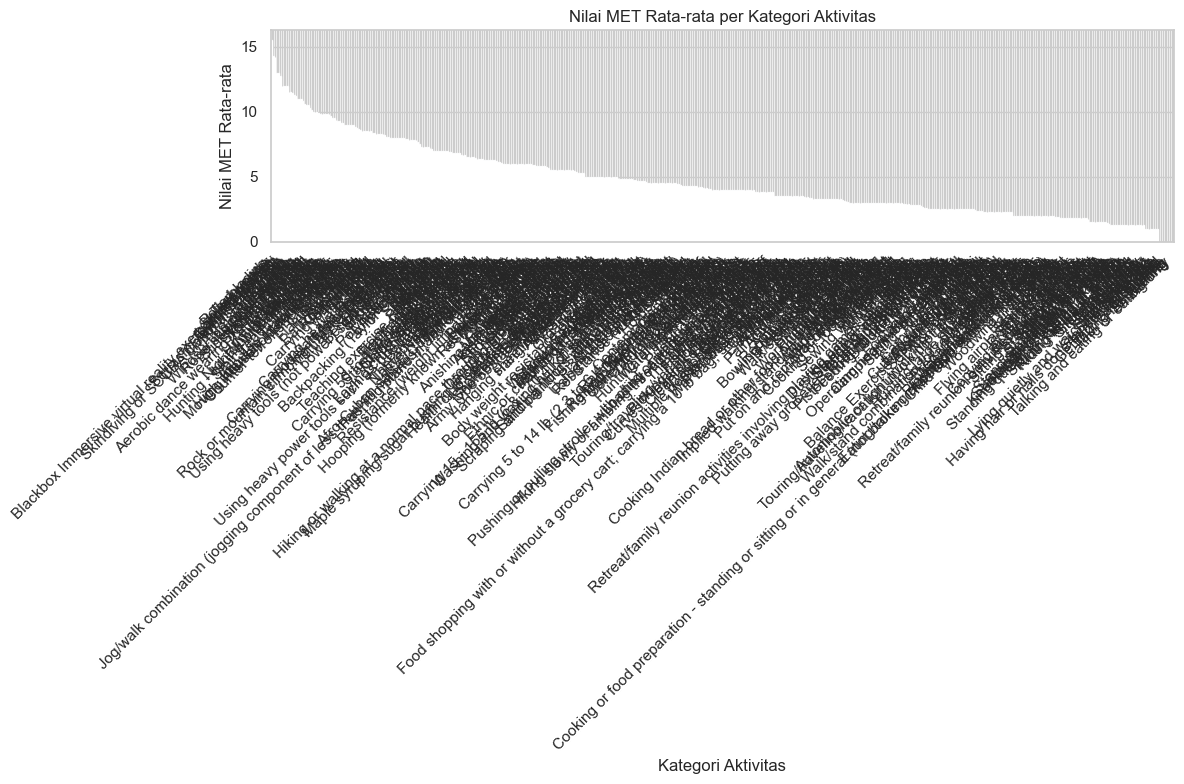

Nilai MET rata-rata per kategori:
activity_category
Rollerblading                                           15.50
Taekwondo                                               14.30
Ski ergometer                                           14.25
Blackbox Immersive virtual reality exergaming system    13.00
ballroom dance                                          13.00
                                                        ...  
Eating                                                   0.00
Taking medication                                        0.00
Showering                                                0.00
Bathing                                                  0.00
Talking and eating or eating only                        0.00
Name: met_value, Length: 519, dtype: float64

== Perbandingan Aktivitas Kardio vs Non-Kardio ==


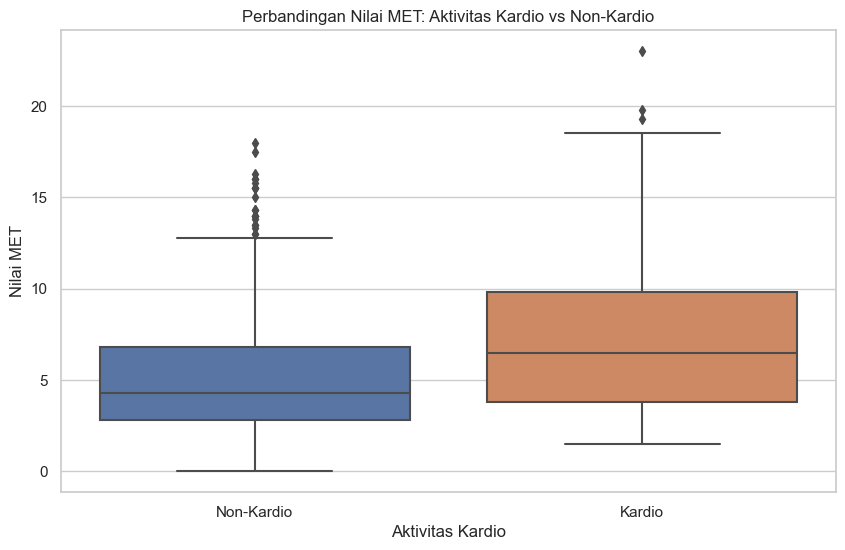


== Perbandingan Kalori Terbakar untuk Aktivitas Populer ==
Aktivitas populer yang dipilih dari dataset:
['Running, 14 mph (4.3 min/mile)', 'Running, 13 mph (4.6 min/mile)', 'Running, on track, 2000-3000m, competitive', 'Running, 12 mph (5.0 min/mile)', 'Ski ergometer, cross country, double poling, fast to maximum speed']


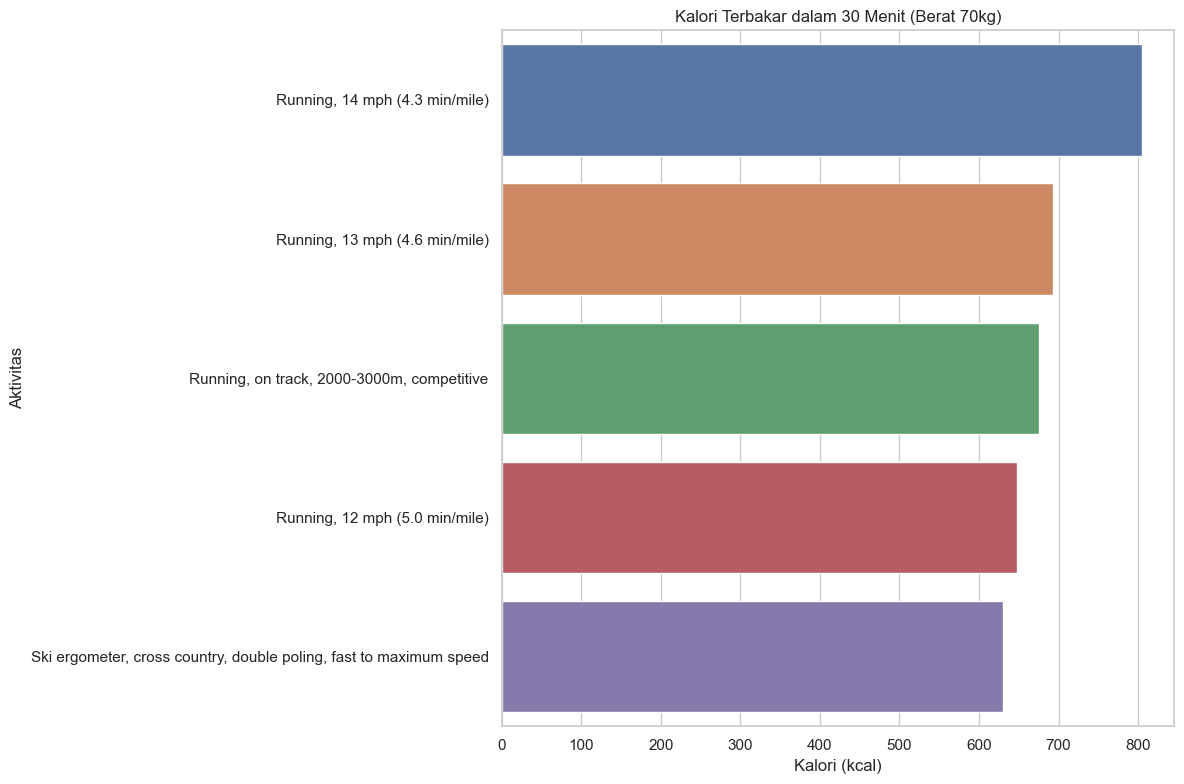

In [13]:
# Distribusi nilai MET
print("\n== Distribusi Nilai MET ==")
plt.figure(figsize=(10, 6))
sns.histplot(activities_clean['met_value'], bins=20, kde=True)
plt.title('Distribusi Nilai MET')
plt.xlabel('Nilai MET')
plt.ylabel('Frekuensi')
plt.axvline(x=3, color='r', linestyle='--', label='Batas Ringan-Sedang')
plt.axvline(x=6, color='g', linestyle='--', label='Batas Sedang-Berat')
plt.legend()
plt.show()

# Nilai MET rata-rata per kategori
print("\n== Nilai MET Rata-rata per Kategori ==")
category_met = activities_clean.groupby('activity_category')['met_value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
category_met.plot(kind='bar')
plt.title('Nilai MET Rata-rata per Kategori Aktivitas')
plt.xlabel('Kategori Aktivitas')
plt.ylabel('Nilai MET Rata-rata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Nilai MET rata-rata per kategori:")
print(category_met)

# Perbandingan aktivitas kardio vs non-kardio
print("\n== Perbandingan Aktivitas Kardio vs Non-Kardio ==")
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_cardio', y='met_value', data=activities_clean)
plt.title('Perbandingan Nilai MET: Aktivitas Kardio vs Non-Kardio')
plt.xlabel('Aktivitas Kardio')
plt.ylabel('Nilai MET')
plt.xticks([0, 1], ['Non-Kardio', 'Kardio'])
plt.show()

# Perbandingan kalori terbakar untuk aktivitas populer
print("\n== Perbandingan Kalori Terbakar untuk Aktivitas Populer ==")

# Dapatkan beberapa aktivitas populer langsung dari dataset
# Pilih 5 aktivitas dengan MET tertinggi untuk contoh
popular_activities_from_data = activities_clean.sort_values('met_value', ascending=False).head(5)['activity_name'].tolist()
print("Aktivitas populer yang dipilih dari dataset:")
print(popular_activities_from_data)

# Plot perbandingan kalori
plt.figure(figsize=(12, 8))
activity_comparison = activities_clean[activities_clean['activity_name'].isin(popular_activities_from_data)][
    ['activity_name', 'calories_70kg_30min']
].sort_values('calories_70kg_30min', ascending=False)

# Pastikan ada data sebelum membuat plot
if not activity_comparison.empty:
    sns.barplot(x='calories_70kg_30min', y='activity_name', data=activity_comparison)
    plt.title('Kalori Terbakar dalam 30 Menit (Berat 70kg)')
    plt.xlabel('Kalori (kcal)')
    plt.ylabel('Aktivitas')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data yang cocok untuk perbandingan aktivitas populer")

## 5. Penyaringan dan Penyiapan Dataset Final

In [14]:
# Memfilter aktivitas yang relevan untuk aplikasi diet
print("\n== Memfilter Aktivitas Relevan untuk Aplikasi Diet ==")
# Pilih aktivitas dengan MET > 3 (minimal intensitas sedang untuk efektivitas pembakaran kalori)
diet_relevant = activities_clean[activities_clean['met_value'] >= 3].copy()
print(f"Jumlah aktivitas relevan untuk diet: {len(diet_relevant)} dari {len(activities_clean)} total")

# Pilih aktivitas kardio yang umum dilakukan
cardio_relevant = diet_relevant[diet_relevant['is_cardio'] == True].copy()
print(f"Jumlah aktivitas kardio relevan: {len(cardio_relevant)}")

# Mengurutkan aktivitas berdasarkan efisiensi pembakaran kalori
diet_relevant = diet_relevant.sort_values('met_value', ascending=False)

# Menambahkan kolom target aplikasi diet
print("\n== Menambahkan Kolom Target Aplikasi Diet ==")
def get_diet_targets(activity_row):
    targets = []
    met = activity_row['met_value']
    is_cardio = activity_row['is_cardio']
    
    if met >= 6:
        targets.append('weight_loss')
    
    if is_cardio:
        targets.append('cardiovascular_health')
    
    if 'weight' in activity_row['activity_name'].lower() or met >= 5:
        targets.append('muscle_tone')
    
    if len(targets) == 0:
        targets.append('general_fitness')
    
    return ', '.join(targets)

diet_relevant['diet_targets'] = diet_relevant.apply(get_diet_targets, axis=1)

# Mengecek distribusi target diet
print("Distribusi target diet:")
for target in ['weight_loss', 'cardiovascular_health', 'muscle_tone', 'general_fitness']:
    count = diet_relevant['diet_targets'].str.contains(target).sum()
    print(f"- {target}: {count} aktivitas")

# Menyusun kolom final
print("\n== Menyusun Dataset Final ==")
final_columns = [
    'activity_id',
    'activity_name',
    'activity_category',
    'met_value',
    'calories_per_kg_per_hour',
    'intensity_level',
    'is_cardio',
    'equipment_needed',
    'location',
    'recommended_duration',
    'recommended_frequency',
    'diet_targets',
    'calories_70kg_30min'  # Contoh kalori untuk referensi cepat
]

final_dataset = diet_relevant[final_columns].copy()
print(f"Dataset final memiliki {len(final_dataset)} baris dan {len(final_columns)} kolom")


== Memfilter Aktivitas Relevan untuk Aplikasi Diet ==
Jumlah aktivitas relevan untuk diet: 857 dari 1111 total
Jumlah aktivitas kardio relevan: 268

== Menambahkan Kolom Target Aplikasi Diet ==
Distribusi target diet:
- weight_loss: 431 aktivitas
- cardiovascular_health: 268 aktivitas
- muscle_tone: 550 aktivitas
- general_fitness: 225 aktivitas

== Menyusun Dataset Final ==
Dataset final memiliki 857 baris dan 13 kolom


## 6. Menyimpan Dataset yang Sudah Dibersihkan

In [15]:
# Menyimpan dataset yang sudah dibersihkan
print("\n== Menyimpan Dataset yang Sudah Dibersihkan ==")
final_dataset.to_csv('physical_activities_cleaned.csv', index=False)
print("Dataset berhasil disimpan sebagai 'physical_activities_cleaned.csv'")

# Menyimpan dataset khusus aktivitas kardio
cardio_dataset = final_dataset[final_dataset['is_cardio'] == True].copy()
cardio_dataset.to_csv('cardio_activities_cleaned.csv', index=False)
print(f"Dataset aktivitas kardio berhasil disimpan sebagai 'cardio_activities_cleaned.csv' ({len(cardio_dataset)} aktivitas)")

# Tampilkan sampel dataset final
print("\n== Sampel Dataset Final ==")
display(final_dataset.head())


== Menyimpan Dataset yang Sudah Dibersihkan ==
Dataset berhasil disimpan sebagai 'physical_activities_cleaned.csv'
Dataset aktivitas kardio berhasil disimpan sebagai 'cardio_activities_cleaned.csv' (268 aktivitas)

== Sampel Dataset Final ==


,activity_id,activity_name,activity_category,met_value,calories_per_kg_per_hour,intensity_level,is_cardio,equipment_needed,location,recommended_duration,recommended_frequency,diet_targets,calories_70kg_30min
601,12135,"Running, 14 mph (4.3 min/mile)",Running,23.0,23.0,Berat,True,None,Both,15-30 menit,2-3 kali/minggu,"weight_loss, cardiovascular_health, muscle_tone",805.0
600,12134,"Running, 13 mph (4.6 min/mile)",Running,19.8,19.8,Berat,True,None,Both,15-30 menit,2-3 kali/minggu,"weight_loss, cardiovascular_health, muscle_tone",693.0
608,12186,"Running, on track, 2000-3000m, competitive",Running,19.3,19.3,Berat,True,None,Both,15-30 menit,2-3 kali/minggu,"weight_loss, cardiovascular_health, muscle_tone",675.5
599,12132,"Running, 12 mph (5.0 min/mile)",Running,18.5,18.5,Berat,True,None,Both,15-30 menit,2-3 kali/minggu,"weight_loss, cardiovascular_health, muscle_tone",647.5
607,12184,"Running, on track, 500-1500m, competitive",Running,18.0,18.0,Berat,True,None,Both,15-30 menit,2-3 kali/minggu,"weight_loss, cardiovascular_health, muscle_tone",630.0


## 7. Fungsi Utility untuk Aplikasi

In [16]:
# Fungsi untuk menghitung kalori terbakar
def calculate_calories_burned(activity_id, weight_kg, duration_minutes):
    """
    Menghitung kalori yang terbakar berdasarkan aktivitas, berat badan, dan durasi.
    
    Parameters:
    activity_id (int): ID aktivitas dari dataset
    weight_kg (float): Berat badan pengguna dalam kg
    duration_minutes (float): Durasi aktivitas dalam menit
    
    Returns:
    float: Jumlah kalori yang terbakar
    """
    # Temukan aktivitas dalam dataset
    activity = final_dataset[final_dataset['activity_id'] == activity_id]
    
    if activity.empty:
        return 0
    
    # Ambil nilai MET
    met_value = activity['met_value'].values[0]
    
    # Hitung kalori
    # Rumus: Kalori = MET × berat (kg) × durasi (jam)
    calories = met_value * weight_kg * (duration_minutes / 60)
    
    return calories

# Fungsi untuk merekomendasikan aktivitas berdasarkan target diet
def recommend_activities(weight_kg, target, fitness_level='beginner', preferred_location=None, available_equipment=None):
    """
    Merekomendasikan aktivitas fisik berdasarkan target diet dan preferensi.
    
    Parameters:
    weight_kg (float): Berat badan pengguna dalam kg
    target (str): Target diet ('weight_loss', 'cardiovascular_health', 'muscle_tone', 'general_fitness')
    fitness_level (str): Tingkat kebugaran ('beginner', 'intermediate', 'advanced')
    preferred_location (str, optional): Preferensi lokasi ('Indoor', 'Outdoor', 'Both')
    available_equipment (list, optional): Daftar peralatan yang tersedia
    
    Returns:
    DataFrame: Aktivitas yang direkomendasikan
    """
    # Filter berdasarkan target
    recommended = final_dataset[final_dataset['diet_targets'].str.contains(target)]
    
    # Filter berdasarkan tingkat kebugaran
    if fitness_level == 'beginner':
        intensity_levels = ['Ringan', 'Sedang']
    elif fitness_level == 'intermediate':
        intensity_levels = ['Sedang', 'Berat']
    else:  # advanced
        intensity_levels = ['Berat']
    
    recommended = recommended[recommended['intensity_level'].isin(intensity_levels)]
    
    # Filter berdasarkan lokasi jika ditentukan
    if preferred_location:
        if preferred_location != 'Both':
            recommended = recommended[recommended['location'] == preferred_location]
    
    # Filter berdasarkan peralatan jika ditentukan
    if available_equipment:
        # Jika pengguna tidak memiliki peralatan, filter aktivitas yang tidak memerlukan peralatan
        if 'None' in available_equipment:
            recommended = recommended[recommended['equipment_needed'] == 'None']
        else:
            # Filter aktivitas yang peralatannya tersedia
            recommended = recommended[recommended['equipment_needed'].isin(['None'] + available_equipment)]
    
    # Urutkan berdasarkan efektivitas (nilai MET)
    recommended = recommended.sort_values('met_value', ascending=False)
    
    # Tambahkan kolom kalori yang akan terbakar
    recommended['estimated_calories'] = recommended['met_value'] * weight_kg * 0.5  # asumsi 30 menit
    
    return recommended[['activity_name', 'met_value', 'intensity_level', 'recommended_duration', 
                        'equipment_needed', 'location', 'estimated_calories']].head(5)

# Fungsi untuk merekomendasikan aktivitas lari
def recommend_running_activity(weight_kg, fitness_level='beginner'):
    """
    Merekomendasikan aktivitas lari berdasarkan tingkat kebugaran.
    
    Parameters:
    weight_kg (float): Berat badan pengguna dalam kg
    fitness_level (str): Tingkat kebugaran ('beginner', 'intermediate', 'advanced')
    
    Returns:
    dict: Rekomendasi aktivitas lari
    """
    # Filter aktivitas lari
    running_activities = final_dataset[
        (final_dataset['activity_category'] == 'Running') | 
        (final_dataset['activity_name'].str.contains('run|jog', case=False))
    ]
    
    # Filter berdasarkan tingkat kebugaran
    if fitness_level == 'beginner':
        intensity = 'Ringan'
        if running_activities[running_activities['intensity_level'] == intensity].empty:
            intensity = 'Sedang'
    elif fitness_level == 'intermediate':
        intensity = 'Sedang'
    else:  # advanced
        intensity = 'Berat'
    
    # Filter berdasarkan intensitas
    recommended_runs = running_activities[running_activities['intensity_level'] == intensity]
    
    # Jika tidak ada yang cocok, ambil yang paling mendekati
    if len(recommended_runs) == 0:
        recommended_runs = running_activities
    
    # Pilih aktivitas dengan nilai MET yang sesuai
    selected_activity = recommended_runs.iloc[0]
    
    # Hitung kalori yang terbakar dalam 30 menit
    calories_30min = selected_activity['met_value'] * weight_kg * 0.5
    
    return {
        'activity_name': selected_activity['activity_name'],
        'met_value': selected_activity['met_value'],
        'intensity_level': selected_activity['intensity_level'],
        'recommended_duration': selected_activity['recommended_duration'],
        'calories_30min': calories_30min,
        'activity_id': selected_activity['activity_id']
    }

# Contoh penggunaan fungsi
print("\n== Contoh Penggunaan Fungsi ==")
print("1. Menghitung kalori terbakar:")
example_activity_id = final_dataset['activity_id'].iloc[0]
example_calories = calculate_calories_burned(example_activity_id, 70, 30)
print(f"Aktivitas ID {example_activity_id} selama 30 menit untuk orang 70kg: {example_calories:.2f} kalori")

print("\n2. Rekomendasi aktivitas untuk penurunan berat badan:")
weight_loss_recommendations = recommend_activities(70, 'weight_loss', 'intermediate', 'Indoor')
display(weight_loss_recommendations)

print("\n3. Rekomendasi aktivitas lari:")
running_recommendation = recommend_running_activity(70, 'beginner')
print(running_recommendation)


== Contoh Penggunaan Fungsi ==
1. Menghitung kalori terbakar:
Aktivitas ID 12135 selama 30 menit untuk orang 70kg: 805.00 kalori

2. Rekomendasi aktivitas untuk penurunan berat badan:


,activity_name,met_value,intensity_level,recommended_duration,equipment_needed,location,estimated_calories
632,"Running curved treadmill, 9.0 to 9.9 mph",16.8,Berat,15-30 menit,Treadmill,Indoor,588.0
36,"Bicycling, stationary, >325 watts, very vigorous",16.3,Berat,15-30 menit,Stationary bike,Indoor,570.5
631,"Running curved treadmill, 8.0 to 8.9 mph",14.0,Berat,15-30 menit,Treadmill,Indoor,490.0
82,"Rowing, stationary, ? 200 watts, very vigorous...",14.0,Berat,15-30 menit,Stationary bike,Indoor,490.0
35,"Bicycling, stationary, 270-305 watts, very vig...",13.8,Berat,15-30 menit,Stationary bike,Indoor,483.0



3. Rekomendasi aktivitas lari:
{'activity_name': 'Running downhill, 5.0 to 5.9 mph, -10% to -15%', 'met_value': 5.8, 'intensity_level': 'Sedang', 'recommended_duration': '30-45 menit', 'calories_30min': 203.0, 'activity_id': 12352}


## 8. Ringkasan dan Kesimpulan

In [17]:
# Menampilkan ringkasan dataset
print("\n== Ringkasan Dataset ==")
print(f"Total aktivitas dalam dataset asli: {len(activities)}")
print(f"Total aktivitas dalam dataset bersih: {len(activities_clean)}")
print(f"Total aktivitas relevan untuk diet: {len(final_dataset)}")
print(f"Total aktivitas kardio: {len(cardio_dataset)}")

print("\nDistribusi intensitas aktivitas dalam dataset final:")
print(final_dataset['intensity_level'].value_counts())

print("\nDistribusi kategori aktivitas dalam dataset final (10 teratas):")
print(final_dataset['activity_category'].value_counts().head(10))

print("\n== Kesimpulan ==")
print("""
Dataset aktivitas fisik telah berhasil dibersihkan dan diperkaya dengan informasi tambahan yang relevan untuk aplikasi diet.
Dataset ini dapat digunakan untuk:
1. Menghitung kalori yang terbakar berdasarkan aktivitas, berat badan, dan durasi
2. Merekomendasikan aktivitas fisik berdasarkan target diet dan preferensi pengguna
3. Memberikan rekomendasi aktivitas lari harian sesuai dengan tingkat kebugaran

Dataset final memiliki kolom-kolom berikut:
- activity_id: ID unik untuk aktivitas
- activity_name: Nama/deskripsi aktivitas
- activity_category: Kategori aktivitas (Cycling, Running, dll)
- met_value: Nilai MET untuk menghitung pembakaran kalori
- calories_per_kg_per_hour: Kalori yang terbakar per kg berat badan per jam
- intensity_level: Tingkat intensitas aktivitas (Ringan, Sedang, Berat)
- is_cardio: Apakah aktivitas termasuk kardio
- equipment_needed: Peralatan yang dibutuhkan untuk aktivitas
- location: Lokasi aktivitas (Indoor, Outdoor, Both)
- recommended_duration: Durasi yang direkomendasikan
- recommended_frequency: Frekuensi yang direkomendasikan per minggu
- diet_targets: Target diet yang sesuai dengan aktivitas
- calories_70kg_30min: Contoh kalori yang terbakar untuk orang 70kg selama 30 menit

Dataset ini siap digunakan untuk pengembangan machine learning dan fitur rekomendasi aktivitas fisik dalam aplikasi diet.
""")


== Ringkasan Dataset ==
Total aktivitas dalam dataset asli: 1111
Total aktivitas dalam dataset bersih: 1111
Total aktivitas relevan untuk diet: 857
Total aktivitas kardio: 268

Distribusi intensitas aktivitas dalam dataset final:
intensity_level
Berat     431
Sedang    426
Name: count, dtype: int64

Distribusi kategori aktivitas dalam dataset final (10 teratas):
activity_category
Walking            69
Running            64
Cycling            45
Swimming           18
Skiing             17
Standing           12
Climbing hills     12
Farming             9
Rollerskiing        9
Aquatic cycling     9
Name: count, dtype: int64

== Kesimpulan ==

Dataset aktivitas fisik telah berhasil dibersihkan dan diperkaya dengan informasi tambahan yang relevan untuk aplikasi diet.
Dataset ini dapat digunakan untuk:
1. Menghitung kalori yang terbakar berdasarkan aktivitas, berat badan, dan durasi
2. Merekomendasikan aktivitas fisik berdasarkan target diet dan preferensi pengguna
3. Memberikan rekomendasi

Notebook ini memberikan proses pembersihan data yang komprehensif dengan struktur yang rapi dan terorganisir. Anda dapat menggunakan kode ini langsung dengan dataset Compendium of Physical Activities untuk mendapatkan dataset bersih yang siap digunakan dalam pengembangan machine learning dan fitur rekomendasi aktivitas fisik dalam aplikasi diet Anda.

Setelah menjalankan notebook ini, Anda akan memiliki dua file CSV:

1. `physical_activities_cleaned.csv` - Dataset lengkap aktivitas fisik yang relevan untuk diet
2. `cardio_activities_cleaned.csv` - Subset aktivitas kardio untuk fitur rekomendasi lari harian